<a href="https://colab.research.google.com/github/HashiniUdara/MITlec/blob/main/MIT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
z = tf.constant(1.0)  # Use float for most activation functions

print(tf.math.sigmoid(z))
print(tf.math.tanh(z))
print(tf.nn.relu(z))

tf.Tensor(0.7310586, shape=(), dtype=float32)
tf.Tensor(0.7615942, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)


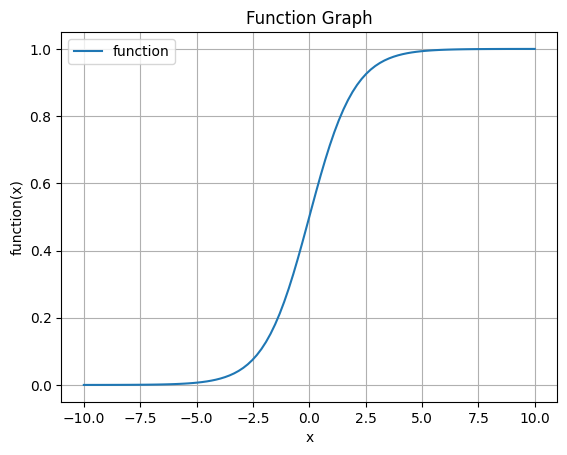

In [ ]:
# this code visualizes functins in graph

# Generate values from -10 to 10
x = np.linspace(-10, 10, 100)
x_tensor = tf.constant(x, dtype=tf.float32)

# Compute sigmoid values
y = tf.math.sigmoid(x_tensor)
# y = tf.math.tanh(x_tensor)
# y = tf.nn.relu(x_tensor)

# Plot the graph
plt.plot(x, y.numpy(), label="function")
plt.title("Function Graph")
plt.xlabel("x")
plt.ylabel("function(x)")
plt.grid(True)
plt.legend()
plt.show()

Dense layer rfom scratch

* **input_dim**: Number of input features.
* **output_dim**: Number of neurons in this layer (i.e., output features).


*   **self.W**: Weight matrix of shape (input_dim, output_dim). It's trainable and will be updated during training.
*   **self.b**: Bias vector of shape (1, output_dim). Also trainable.


**tf.matmul(inputs, self.W)**
This does matrix multiplication

**Visualization of the Math**


*   inputs: [x1, x2, x3]
*   weights (for one output neuron): [w1, w2, w3]
*   bias: b
*   z = x1*w1 + x2*w2 + x3*w3 + b

In [ ]:
class MyDenseLayer(tf.keras.layers.Layer):
  def __init__(self,input_dim,output_dim) :
    super(MyDenseLayer, self).__init__()

    # initialize weights and bias
    self.W = self.add_weight([input_dim, output_dim])
    self.b = self.add_weight([1, output_dim])

  def call(self, inputs) :
    # linear transformation of the inputs before applying an activation function.
    # forward propagate the inputs
    z = tf.matmul(inputs, self.W) + self.b

    print("inputs ")
    print(inputs)
    print("weight matrix ")
    print(self.W)
    print("bias vector ")
    print(self.b)

    # feed through a non-lenier action
    output = tf.math.sigmoid(z)

    return output

It's equivalent to a standard dense layer like:

But you are implementing it manually, which is useful for:
Learning how layers work under the hood
Customizing behavior beyond standard Dense layers

In [ ]:
# don't run this
# tf.keras.layers.Dense(output_dim, activation='sigmoid')

below code use the above class and explain how to use it

Layer output:
tf.Tensor(
[[-0.61216116  3.3869705  -5.7797136 ]
 [ 3.3491297  -0.7769778  -6.5580497 ]], shape=(2, 3), dtype=float32)


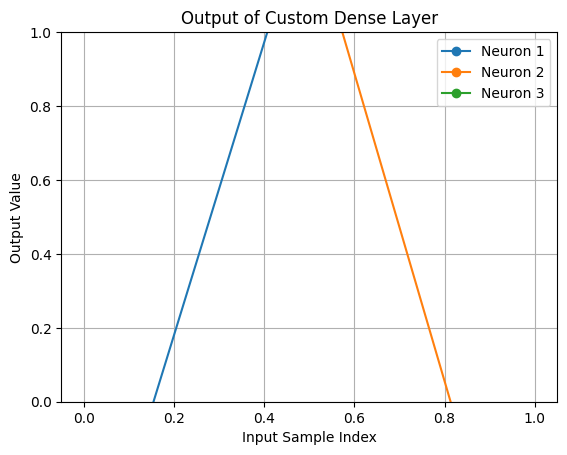

In [ ]:
# Create an instance of the layer
layer = MyDenseLayer(input_dim=4, output_dim=3)
layer = tf.keras.layers.Dense(units=3)

# Create a sample input (batch of 2 samples, each of 4 features)
x_input = tf.constant([[1.0, 2.0, 3.0, 7.0],
                       [4.0, 5.0, 6.0, 8.0]])

# Pass the input through the custom layer
output = layer(x_input)


# Print the output
print("Layer output:")
print(output)

# Plot output for each neuron
for i in range(output.shape[1]):
    plt.plot(output[:, i], label=f'Neuron {i+1}', marker='o')

plt.title("Output of Custom Dense Layer")
plt.xlabel("Input Sample Index")
plt.ylabel("Output Value")
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()